# ```TB_to_sympy```: Simplifying Hamiltonian Expressions for Condensed Matter Systems Within a Tight-Binding Model Framework.

## Introduction. ##

The tight-binding (TB) model is used in condensed matter physics to model the properties of conductors, semiconductors, and insulators. Experimental physicists often interact with the TB model during electronic band structure measurements, like angle-resolved photoemission spectroscopy (ARPES). They must verify that their experimental data aligns with theoretical predictions. The TB model's tractability offers a clear analytical solution, which proves efficient for experimentalists to quickly validate their data. Thus, there's a need for a function like ```TB_to_sympy```, which provides a reduced analytical Hamiltonian expression for the analyzed element.

The ```TB_to_sympy``` function takes hopping amplitudes to generate a TB model. The hopping amplitudes are obtained from the Wannier90 package, which fits the band structure obtained from density functional theory (DFT) for a set of orbitals. The larger the hopping amplitude, the more significant it is. For instance, a hopping amplitude of 0.00005 eV does not contribute as much to the movement of an electron as a hopping amplitude of 0.05 eV. There is a need for a cutoff either in the hopping distances or the hopping amplitudes. A minimal model can neglect these smaller amplitudes. Using the PythTB package's ```model``` function, we select only the hopping amplitudes bigger than the cutoff or smaller than the cutoff distance, restricting the hopping processes to be closer.

In second quantization, the TB Hamiltonian is given by:

$$
H = -\sum_{i j l_1 l_2 \sigma} t_{i j}^{l_1 l_2} [c^{\dagger}_{i l_1 \sigma} c_{j l_2 \sigma} + c^{\dagger}_{j l_2 \sigma} c_{i l_1 \sigma}]
$$

where:
- $t_{i j}^{l_1 l_2}$ is the hopping amplitude between orbital $l_1$ on site $i$ and orbital $l_2$ on site $j$.
- $\sigma$ is the spin and $c^{\dagger}$
- $c$ are creation and annihilation operators.

In this tutorial, we examine a system with one orbital and one site per unit cell. By performing a Fourier transform of the Hamiltonian from real space to momentum space, we obtain $H(\bold{k})$, which is achieved using the ```TB_to_sympy``` function.

$$
H(\bold{k}) = \frac{1}{(2\pi)^d} \sum_{\bold{R}} e^{i\bold{k} \cdot \bold{R}} H_{\bold{R}}
$$



### Function Definition and its Parameters. ###

```TB_to_sympy``` is defined as:
```python
def TB_to_sympy(w90_triqs, analytical = True, precision = 6):

The only required parameter for our function is ```w90_triqs```, a TRIQS TBLattice Object (Tight-Binding Lattice Object). To obtain ```w90_triqs```, you can use TRIQS-provided functions that allow conversion of your model to a TRIQS TBLattice object. These functions are:
1. ```TB_from_pythTB``` that converts your model from a pythTB model to a TRIQS TBLattice Object.
2. ```TB_from_wannier90``` which converts your model from a Wannier90 model to a TRIQS TBLattice Object. It reads wannier90 output and converts it to a TBLattice object.

Currently, it is advisable to utilize ```TB_from_pythTB``` since it enables straightforward initiation of cutoffs to your pythTB model before converting it to a TBLattice object, especially for complex systems, granting greater control over your model and allows examination of the output's behavior at different cutoffs. The possible cutoff parameters in pythTB include:
1. ```zero_energy```: This parameter establishes the energy zero point in the band structure, typically aligned with the Fermi level.
2. ```min_hopping_norm```: The hopping terms obtained from Wannier90 are filtered based on their hopping amplitudes (measured in electron volts). Terms with amplitudes less than ```min_hopping_norm``` are excluded from the calculations.
3. ```max_distance```: Hopping distances exceeding ```max_distance``` are disregarded during the calculations.

The ```analytical``` flag ensures that the default Hamiltonian returned by ```sympyfy``` is in an analytical form. If the user sets the ```analytical``` flag to ```False```, the resulting Hamiltonian will be in a "numerical" form. Although termed "numerical," this expression still depends on the parameters of the k-space vectors (```kx```, ```ky```, and ```kz```) as the lattice constants and vectors are expressed numerically. For simplicity, we will continue to refer to it as numerical in this tutorial, assuming the user can provide numerical values for ```kx```, ```ky```, and ```kz```.

Lastly, the ```precision``` parameter allows the user to control the number of digits in the hopping amplitudes and lattice parameters.

## Calling the Function ##

Let us first import the necessary dependencies.

In [6]:
# importing the dependencies
from itertools import product as itp
from pythtb import *
from triqs.lattice.tight_binding import TBLattice
import sympy as sp
import warnings
import numpy as np
import matplotlib.pyplot as plt

# importing the file containing the TB_to_sympy function
import TB_to_sympy
from TB_to_sympy import TB_to_sympy

Let us first load a model of $La_2CuO_4$, lanthanum copper oxide, a high-temperature superconductor:

In [7]:
from triqs.lattice.utils import TB_from_pythTB
# accessing the necessary Wannier90 output files
w90_input = w90('AbinitioDMFT/data/mlwf/', 'lco')
fermi_ev = 12.7367
w90_model = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.05, max_distance = None)
w90_triqs_La2CuO4 = TB_from_pythTB(w90_model)

We can call ```TB_from_sympy``` for different cases depending on the values we assign to its parameters. Here is one case:

In [8]:
print("The analytical expression \n", TB_to_sympy(w90_triqs_La2CuO4, analytical = True, precision = 3))

The analytical expression 
 [[-0.88*cos(a1k + a3k) - 0.88*cos(a2k + a3k) + 0.159]]


In [9]:
print("The numerical expression \n", TB_to_sympy(w90_triqs_La2CuO4, analytical = False, precision = 3))

The numerical expression 
 [[-0.88*cos(3.818*kx) - 0.88*cos(3.818*ky) + 0.159]]


The main distinction between the analytical and numerical expressions is that the numerical expression depends on ```kx```, ```ky```, and ```kz```, while the analytical expression additionally depends on the lattice vectors, ```a1```, ```a2```, and ```a3```. The lattice vectors define the orientation and shape of the crystal unit cell and can be replaced with numerical values using the ```units``` function from the TRIQS TB lattice object.

## Band Structure ##

The band structure's accuracy depends on the user's choice of ```min_hopping_norm``` and ```max_distance``` values. By adjusting these parameters, the cutoff model can closely resemble the full Wannier90 model while providing a concise analytical Hamiltonian expression. Below is a visual example illustrating this. The graph displays the band energy plotted against the points along the k-path using a ```min_hopping_norm``` of 0.05 eV and 0.01 eV with no set maximum distance.

![The band structure of lanthanum cuprate at different cutoffs.png](<attachment:The band structure of lanthanum cuprate at different cutoffs.png>)

With a lower cutoff of 0.01 eV, more hopping amplitudes are included which makes for a band structure that closely resembles the full Wannier90 band structure (which has all the hopping amplitudes present, that is, the full Wannier90 model includes all the hopping amplitudes when calculating the band energies across multiple k-paths).
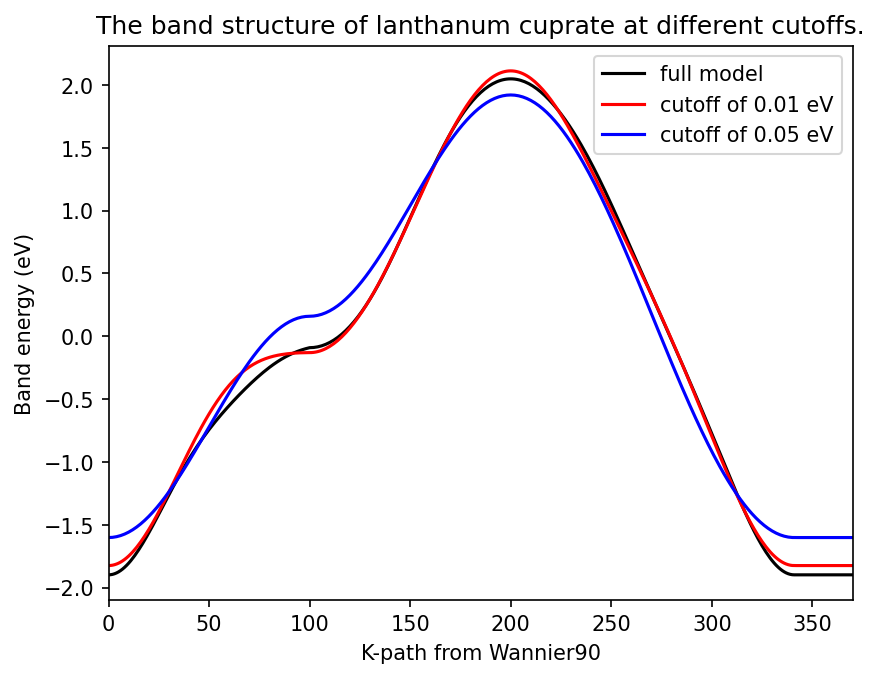

The analytical expression for the Lanthanum compound when the ```min_hopping_norm``` cutoff is 0.038 eV (the hopping dictionary has 9 terms).

$$
[\begin{bmatrix}
-0.880642 \cos(a_1 k + a_3 k) - 0.076302 \cos(2 a_1 k + 2 a_3 k) \\
-0.880642 \cos(a_2 k + a_3 k) - 0.076302 \cos(2 a_2 k + 2 a_3 k) + 0.158922
\end{bmatrix}]
$$

The numerical expression for the Lanthanum compound when the ```min_hopping_norm``` cutoff is 0.038 eV (the hopping dictionary has 9 terms):
$$
\begin{bmatrix}
-0.88 \cos(3.818 k_x) - 0.076 \cos(7.636 k_x) \\
- 0.88 \cos(3.818 k_y) - 0.076 \cos(7.636 k_y) + 0.159
\end{bmatrix}
$$

$$
[\begin{bmatrix}
-0.880642 \cos(a_1 k + a_3 k) - 0.076302 \cos(2 a_1 k + 2 a_3 k) \\
-0.880642 \cos(a_2 k + a_3 k) - 0.076302 \cos(2 a_2 k + 2 a_3 k) + 0.158922
\end{bmatrix}]
$$

When you represent the analytical Hamiltonian in terms of $t$, you get:

$$
H = \varepsilon + H_{t_1} + H_{t_2} = 0.158 + (2 t_1 \cos(3.818 k_x) + 2 t_1 \cos(3.818 k_y)) + (2 t_2 \cos(7.636 k_x) + 2 t_2 \cos(7.636 k_y)) 
$$
where:
- $\varepsilon = 0.159$ eV is the onsite energy at the home unit cell.
- $t_1 = - 0.440$ eV.
- $t_2 = - 0.038$ eV.
- $H_{t_1} = 2 t_1 \cos(3.818 k_x) + 2 t_1 \cos(3.818 k_y)$
- $H_{t_2} = 2 t_2 \cos(7.636 k_x) + 2 t_2 \cos(7.636 k_y)$



The corresponding hopping term dictionary is:
$$
\begin{align*}
&(0, 0, 0): \begin{bmatrix} 0.158922 \end{bmatrix}, \\
&(0, 1, 1): \begin{bmatrix} -0.440321 \end{bmatrix}, \\
&(0, -1, -1): \begin{bmatrix} -0.440321 \end{bmatrix}, \\
&(0, 2, 2): \begin{bmatrix} -0.038151 \end{bmatrix}, \\
&(0, -2, -2): \begin{bmatrix} -0.038151 \end{bmatrix}, \\
&(1, 0, 1): \begin{bmatrix} -0.440321 \end{bmatrix}, \\
&(-1, 0, -1): \begin{bmatrix} -0.440321 \end{bmatrix}, \\
&(2, 0, 2): \begin{bmatrix} -0.038151 \end{bmatrix}, \\
&(-2, 0, -2): \begin{bmatrix} -0.038151 \end{bmatrix}
\end{align*}
$$


$$
H = \varepsilon + H_{t_1} + H_{t_2} = 0.158 + (2 t_1 \cos(a_1 k + a_3 k) + 2 t_1 \cos(a_2 k + a_3 k)) + (2 t_2 \cos(2 a_1 k + 2 a_3 k) + 2 t_2 \cos(2 a_2 k + 2 a_3 k))
$$

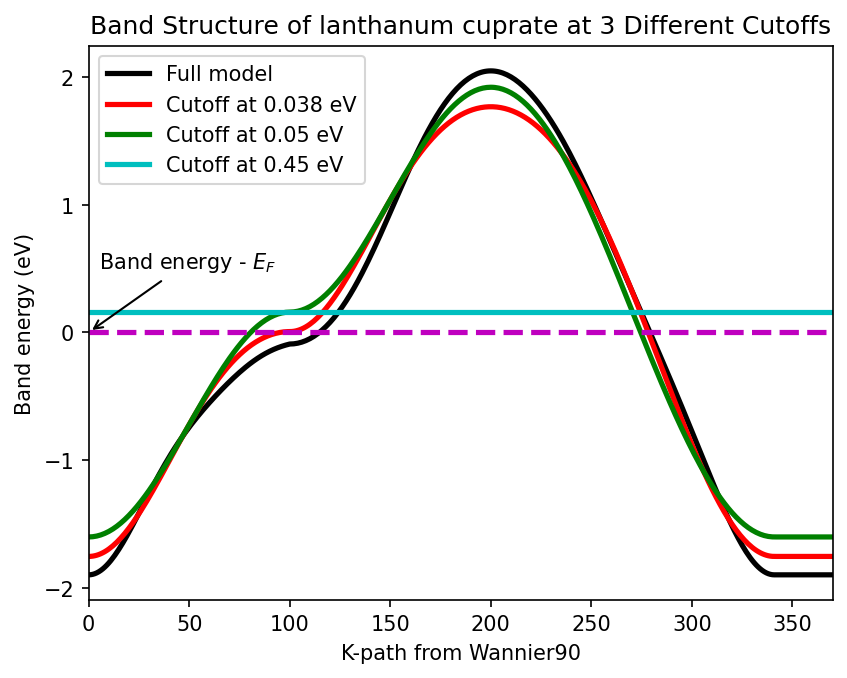

In [20]:
# importing the dependencies
from itertools import product as itp
from pythtb import *
from triqs.lattice.tight_binding import TBLattice
import sympy as sp
import warnings
import numpy as np
import matplotlib.pyplot as plt

from triqs.lattice.utils import TB_from_pythTB
w90_input = w90('La2CuO4 Files', 'lco')
fermi_ev = 12.7367
w90_model = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.038, max_distance = None)
w90_triqs = TB_from_pythTB(w90_model)

def compareBandStructure(w90_input, fermi_ev): 
    # get band structure from wannier90
    # BLACK - the full model
    # the purpose of this function is to compare the interpolation in W90 with that in PythTB
    # returns kpts (k-points in reduced coordinates used in the interpolation in W90 code) and
    # ene (energies interpolated by W90 in the form of ene[band, kpoint])
    (w90_kpt, w90_evals) = w90_input.w90_bands_consistency()

    # get the simplified model by introducing cutoff parameters
    w90_model_038 = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.038, max_distance = None)
    w90_model_05 = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.05, max_distance = None)
    w90_model_45 = w90_input.model(zero_energy = fermi_ev, min_hopping_norm = 0.45, max_distance = None)

    # RED - the reduced model
    # solve simplified model on the same k-path as in wannier90
    # solves for eigenvalues and (optionally) eigenvectors of the TB model on a given 1D list of k-vectors
    int_evals_038 = w90_model_038.solve_all(w90_kpt)
    int_evals_05 = w90_model_05.solve_all(w90_kpt)
    int_evals_45 = w90_model_45.solve_all(w90_kpt)

    # plotting the comparison of the 2 models

    # the plotting
    fig, ax = plt.subplots(dpi = 150)

    for i in range(w90_evals.shape[0]):
        x_axis = list(range(w90_evals.shape[1]))
        y_axis = w90_evals[i] - fermi_ev
        ax.plot(x_axis, y_axis, "k-", zorder = -100)

    # the reduced model
    for i in range(int_evals_038.shape[0]):
        ax.plot(list(range(int_evals_038.shape[1])), int_evals_038[i], "r-", zorder = -50)
        ax.plot(list(range(int_evals_05.shape[1])), int_evals_05[i], "g-", zorder = -50)
        ax.plot(list(range(int_evals_45.shape[1])), int_evals_45[i], "c-", zorder = -50)
    
    ax.axhline(y = 0, color = 'm', linestyle = '--')
    y_intercept = 0

    ax.annotate(r"Band energy - $E_F$", xy = (0, y_intercept), xytext = (5, y_intercept + 0.5), arrowprops = dict(facecolor = "black", arrowstyle = "->"))
    ax.set_yticks(np.arange(-2, 2.1, step = 1))


    # increasing the line width of the plotted lines
    lines = ax.lines
    for line in lines:
        line.set_linewidth(2.5)
    

    ax.set_xlim(0, int_evals_038.shape[1] - 1)
    ax.set_xlabel("K-path from Wannier90")
    ax.set_ylabel("Band energy (eV)")
    ax.set_title(r"Band Structure of lanthanum cuprate at 3 Different Cutoffs")
    ax.legend(["Full model", "Cutoff at 0.038 eV", "Cutoff at 0.05 eV", "Cutoff at 0.45 eV"])

# calling the function
lanthanum_w90_input = w90('La2CuO4 Files', 'lco')
compareBandStructure(lanthanum_w90_input, 12.7367)

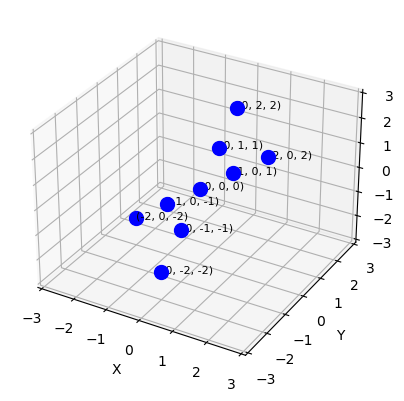

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coordinates of hopping sites
coordinates = [(0, 0, 0), (0, 1, 1), (0, -1, -1), (0, 2, 2), (0, -2, -2), (1, 0, 1), (-1, 0, -1), (2, 0, 2), (-2, 0, -2)]

# Extracting individual coordinates
x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]
z = [coord[2] for coord in coordinates]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the hopping coordinates and labeling each point
for i, coord in enumerate(coordinates):
    ax.scatter(coord[0], coord[1], coord[2], s=100, c='b', marker='o')
    ax.text(coord[0], coord[1], coord[2], f'({coord[0]}, {coord[1]}, {coord[2]})', fontsize=8)

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Show the plot
plt.show()


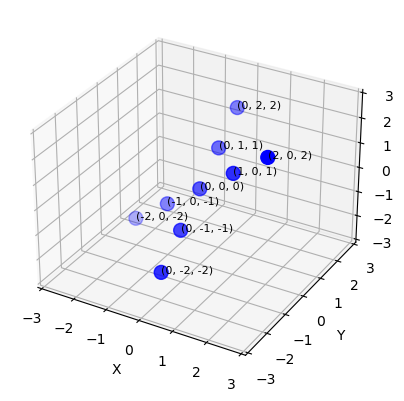

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coordinates of hopping sites
coordinates = [(0, 0, 0), (0, 1, 1), (0, -1, -1), (0, 2, 2), (0, -2, -2), (1, 0, 1), (-1, 0, -1), (2, 0, 2), (-2, 0, -2)]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the hopping coordinates
ax.scatter([coord[0] for coord in coordinates],
           [coord[1] for coord in coordinates],
           [coord[2] for coord in coordinates],
           s=100, c='b', marker='o')

# Annotating each point with its coordinate
for i, coord in enumerate(coordinates):
    ax.text(coord[0], coord[1], coord[2], f'({coord[0]}, {coord[1]}, {coord[2]})', fontsize=8)

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# Show the plot
plt.show()

In [1]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Coordinates of hopping sites
# coordinates = [(0, 0, 0), (0, 1, 1), (0, -1, -1), (0, 2, 2), (0, -2, -2), (1, 0, 1), (-1, 0, -1), (2, 0, 2), (-2, 0, -2)]

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plotting the hopping coordinates
# ax.plot([coord[0] for coord in coordinates],
#         [coord[1] for coord in coordinates],
#         [coord[2] for coord in coordinates],
#         marker='o', markersize=8, linestyle='-', color='b')

# # Annotating each point with its coordinate
# for i, coord in enumerate(coordinates):
#     ax.text(coord[0], coord[1], coord[2], f'({coord[0]}, {coord[1]}, {coord[2]})', fontsize=8)

# # Set labels for each axis
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Set plot limits
# ax.set_xlim(-3, 3)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-3, 3)

# # Show the plot
# plt.show()
